## 05 다항 회귀와 과대적합/과소적합 이해

### 다항 회귀 이해 

In [1]:
# 세상의 모든 관계를 직선으로만 표현할 수는 없다.
# 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것을 
# 다항(Polynomial) 회귀라고 한다.
# 다항 회귀는 선형 회귀라는 점이다. 회귀에서 선형/비선형 회귀를 나누는 기준은
# 회귀 계수가 선형/비선형인지에 따른 것이지, 독립변수의 선형/비선형 여부와는 무관하다.

In [3]:
# 사이킷런은 PolynomialFeatures 클래스를 통해 피처를 Polynomial(다항) 피처로 변환한다.
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0, 1], [2, 3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 feature:\n', X)

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [5]:
# 3차 다항식 결정값을 구하는 함수 polynomial_func(X) 생성.
# 즉 회귀식은 결정값 y = 1+2x_1 + 3x1^2 + 4x_2^3

def polynomial_func(X):
    y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
    print(X[:, 0])
    print(X[:, 1])
    return y

X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature: \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
[0 2]
[1 3]
삼차 다항식 결정값: 
 [  5 125]


In [7]:
# 3차 다항식 계수의 피처값과 3차 다항식 결정값으로 학습

# 3차 다항식 변환

poly_ftr = PolynomialFeatues(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.ft(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape:', model.coef_.shape)

NameError: name 'PolynomialFeatues' is not defined

### 사이킷런 파이프라인(Pipeline)을 이용하여 3차 다항회귀 학습

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

### 다항 회귀를 이용한 보스턴 주택가격 예측

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

# boston 데이터세트 로드
boston = load_boston()

# boston dataaset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함.
bostonDF['PRICE'] = boston.target
print('Boston 데이터세트 크기:', bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

## Pipeline을 이용하여 PolynomialFeatues 변환과 LinearRegression 적용을 순차적으로 결합.
p_model = Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=False)),
                   ('linear', LinearRegression())])

p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE: {):.3f}, RMSE: {1:.3f}'.format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

In [ ]:
X_train_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train, y_train)
X_train_poly.shape, X_train.shape

### 다항회귀를 이용한 과소적합, 과(대)적합 이해

In [14]:
# 다항 회귀는 피처의 직선적 관계가 아닌 복잡한 다항 관계를 모델링 할 수 있다.
# 다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모뎅링이 가능하다.
# 다항 회귀의 차수(degree)를 높일수록 테스트 데이터 환경에서는 오히려
# 예측의 정확도가 떨어진다.
# 즉, 차수가 높아질수록 과적합의 문제가 크게 발생한다.

#### cosine 곡선에 약간의 Noise 변동값을 더하여 실제값 곡선을 만든다 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환.
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 random 값을 순서대로 sampling 한 데이터 이다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값이다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1

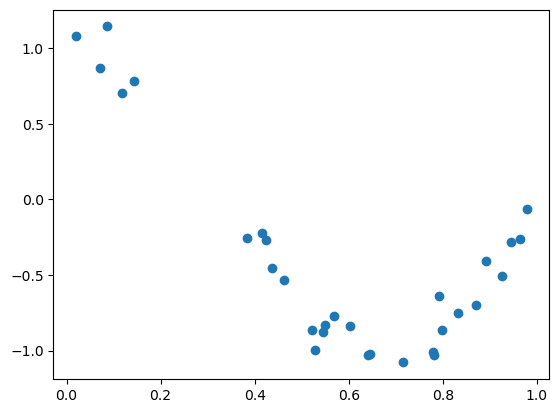

In [9]:
plt.scatter(X, y)


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03900000e+05 -1.87416400e+06  2.03716560e+07
 -1.44873571e+08  7.09316967e+08 -2.47066414e+09  6.24562770e+09
 -1.15676855e+10  1.56895436e+10 -1.54006546e+10  1.06457645e+10
 -4.91379382e+09  1.35920182e+09 -1.70381489e+08] 입니다.
Degree 15 MSE는 182663732.56 입니다.


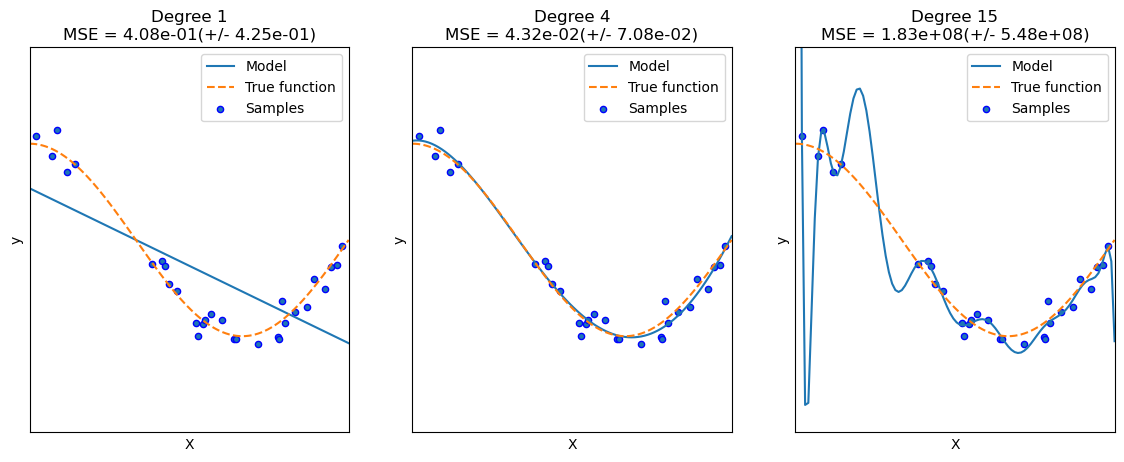

In [13]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교한다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환한다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                        ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가한다.
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE는 {1:.2f} 입니다.'.format(degrees[i], -1*np.mean(scores)))

    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행한다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교한다.
    X_test = np.linspace(0, 1, 100)
    
    # 예측 값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("X"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

In [16]:
# 실선으로 표현된 예측 곡선은 다항 회귀 예측 곡선이며,
# 점선으로 표현된 곡선은 실제 데이터 세트 X, Y의 코사인 곡선이다.
# 좋은 예측 모델은 학습 데이터의 패턴을 잘 반영하면서도 복잡하지 않은 균형 잡힌(Balanced) 모델을 의미한다.

### 편향-분산 트레이드오프(Bias-Variance Trade Off)

In [17]:
# 편향-분산 트레이드오프는 머신러닝이 극복해야 할 가장 중요한 이슈 중의 하나이다.
# 일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향이 있다.
# 편향이 너무 높으면 전체 오류가 높다. 편향을 낮추면 동시에 분산이 높아지고 전체 오류도 낮아지게 된다.
# 평향을 낮추고 분산을 높이면서 전체 오류가 가장 낮아지는 '골디락스' 지점을 통과하면서
# 분산을 지속적으로 높이면 전체 오류 값이 오히려 증가하면서 예측 성능이 다시 저하된다.
# 편향과 분산이 서로 트레이드오프를 이루면서 오류 Cost값이 최대로 낮아지는 모델을 구축하는 것이
# 가장 효율적인 머신러닝 예측 모데을 만드는 방법이다.